In [11]:
# Set A: 1. Consider any text paragraph. Preprocess the text to remove any special characters and digits. Generate the summary using extractive summarization process.

import heapq
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

paragraph = """
The field of artificial intelligence (AI) is rapidly transforming the world around us. 
From self-driving cars to personalized medicine, AI's potential seems limitless. 
However, this rapid advancement also brings significant challenges. 
One of the primary concerns is the impact on the workforce, as automation could displace millions of jobs. 
Furthermore, ethical considerations surrounding bias in algorithms and data privacy are becoming increasingly important. 
It is crucial for researchers, policymakers, and the public to engage in a continuous dialogue to ensure that AI develops in a way that benefits all of humanity. 
The decisions we make today will shape the future of this powerful technology.
"""

# Preprocess
formatted_text = re.sub(r"[^a-zA-Z\s]", " ", paragraph)
formatted_text = re.sub(r"\s+", " ", formatted_text)

# Tokenize
sentences = sent_tokenize(paragraph)
words = word_tokenize(formatted_text.lower())

# Word frequency
stop_words = set(stopwords.words("english"))
word_frequencies = {}

for word in words:
    if word not in stop_words:
        word_frequencies[word] = word_frequencies.get(word, 0) + 1

# Normalize
maximum_frequency = max(word_frequencies.values())
for word in word_frequencies:
    word_frequencies[word] /= maximum_frequency

# Sentence scoring
sentence_scores = {}
for sent in sentences:
    for word in word_tokenize(sent.lower()):
        if word in word_frequencies:
            sentence_scores[sent] = sentence_scores.get(sent, 0) + word_frequencies[word]

# Generate summary
summary_sentences = heapq.nlargest(2, sentence_scores, key=sentence_scores.get)
summary = " ".join(summary_sentences)

print(summary)

It is crucial for researchers, policymakers, and the public to engage in a continuous dialogue to ensure that AI develops in a way that benefits all of humanity. 
The field of artificial intelligence (AI) is rapidly transforming the world around us.


Most Common Words: [('world', 2), ('insects', 2), ('rainforest', 1), ('lush', 1), ('green', 1)]


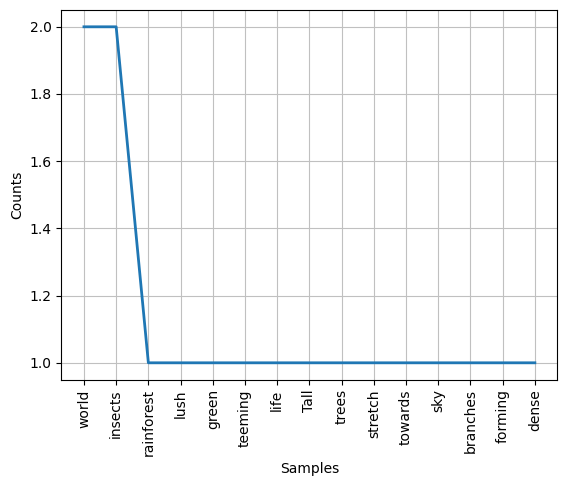

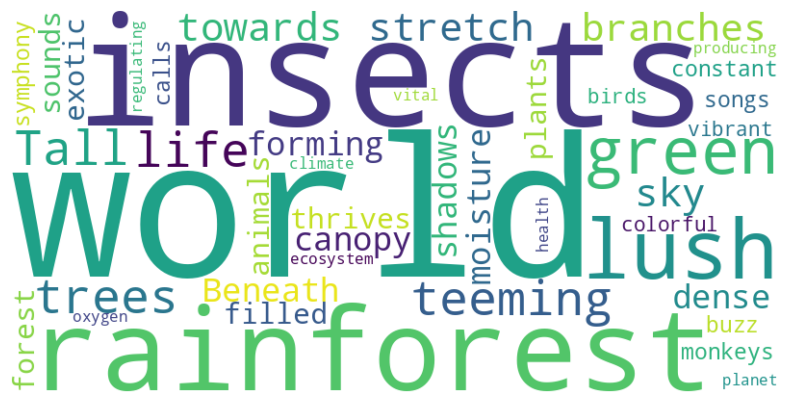

In [12]:
# Set A: 2. Consider any text paragraph. Remove the stopwords. Tokenize the paragraph to extract words and sentences. Calculate the word frequency distribution and plot the frequencies. Plot the wordcloud of the text.
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

paragraph = """
The rainforest is a lush, green world teeming with life. Tall trees stretch towards the sky, their branches forming a dense canopy. Beneath this, a world of shadows and moisture thrives, filled with exotic plants, insects, and animals. The sounds of the forest are a constant symphony: the calls of monkeys, the buzz of insects, and the songs of colorful birds. This vibrant ecosystem is vital for the planet's health, producing oxygen and regulating the climate.
"""

# Tokenize words
words = word_tokenize(paragraph)

# Remove stopwords & non-alphabetic words
stop_words = set(stopwords.words("english"))
filtered_words = [
    word for word in words
    if word.lower() not in stop_words and word.isalpha()
]

if filtered_words:
    # Frequency Distribution
    freq_dist = FreqDist(filtered_words)
    print("Most Common Words:", freq_dist.most_common(5))

    freq_dist.plot(15, cumulative=False)
    plt.show()

    # WordCloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white"
    ).generate(" ".join(filtered_words))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("No words left after filtering.")

In [13]:
# Set A: 3. Consider the following review messages. Perform sentiment analysis on the messages.
#           i. I purchased headphones online. I am very happy with the product.
#           ii. I saw the movie yesterday. The animation was really good but the script was ok.
#           iii. I enjoy listening to music
#           iv. I take a walk in the park everyday
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

reviews = [
    "I purchased headphones online. I am very happy with the product.",
    "I saw the movie yesterday. The animation was really good but the script was ok.",
    "I enjoy listening to music",
    "I take a walk in the park everyday",
]

print("--- Sentiment Analysis Results ---")

for i, review in enumerate(reviews, 1):
    print(f'\nReview {i}: "{review}"')

    scores = analyzer.polarity_scores(review)
    compound = scores["compound"]

    if compound >= 0.05:
        overall = "Positive"
    elif compound <= -0.05:
        overall = "Negative"
    else:
        overall = "Neutral"

    print(f"  Scores: {scores}")
    print(f"  Overall Sentiment: {overall}")

--- Sentiment Analysis Results ---

Review 1: "I purchased headphones online. I am very happy with the product."
  Scores: {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.6115}
  Overall Sentiment: Positive

Review 2: "I saw the movie yesterday. The animation was really good but the script was ok."
  Scores: {'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.5989}
  Overall Sentiment: Positive

Review 3: "I enjoy listening to music"
  Scores: {'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4939}
  Overall Sentiment: Positive

Review 4: "I take a walk in the park everyday"
  Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
  Overall Sentiment: Neutral


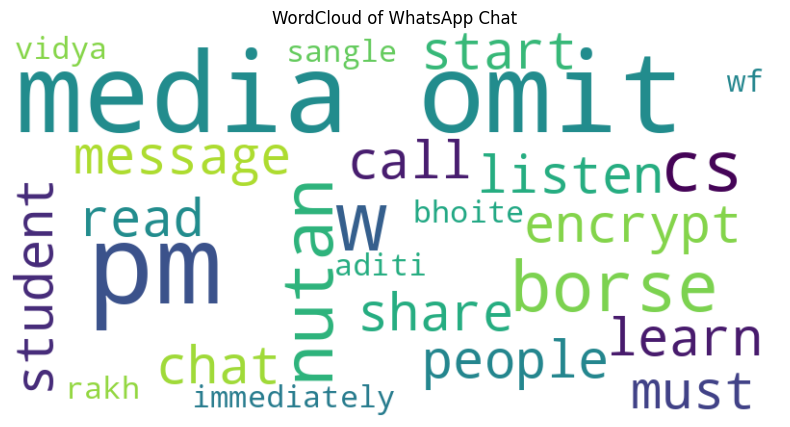

In [14]:
# Set A: 4. Perform text analytics on WhatsApp data : Write a Python script for the following :
#           i. First Export the WhatsApp chat of any group. Read the exported ".txt" file using open() and read() functions.
#           ii. Tokenize the read data into sentences and print it.
#           iii. Remove the stopwords from data and perform lemmatization.
#           iv. Plot the wordcloud for the given data.

import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

file_path = "whatsapp_chat.txt"

try:
    with open(file_path, "r", encoding="utf-8") as file:
        chat_data = file.read()
except FileNotFoundError:
    print(f"Error: File not found at {file_path}.")
    exit()

# Remove WhatsApp timestamps
cleaned_text = re.sub(
    r"\[\d{1,2}\/\d{1,2}\/\d{2,4},?\s*\d{1,2}:\d{2}(?::\d{2})?[^\]]*\]\s*",
    "",
    chat_data,
)
cleaned_text = re.sub(
    r"\d{1,2}\/\d{1,2}\/\d{2,4},?\s*\d{1,2}:\d{2}\s*-\s*", "", cleaned_text
)
cleaned_text = re.sub(r"^[^:]+:\s*", "", cleaned_text, flags=re.MULTILINE)

# Process words
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

all_words = word_tokenize(cleaned_text.lower())

processed_words = [
    lemmatizer.lemmatize(word, pos="v")
    for word in all_words
    if word.isalpha() and word not in stop_words
]

# Generate WordCloud
if processed_words:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap="viridis",
    ).generate(" ".join(processed_words))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("WordCloud of WhatsApp Chat")
    plt.show()
else:
    print("No words left after processing.")